<a href="https://colab.research.google.com/github/kumar-sendhi/courseraml/blob/master/Sentimentprojectv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy
!pip install textblob 
!pip install wordcloud

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
log = pd.read_csv("sample_data/Login.csv")

consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [4]:
authenticate =tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [5]:
import csv
csvFile = open('tweet.csv', 'a')
csvWriter = csv.writer(csvFile)


In [6]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

searched_tweets = []
last_id = -1
while len(searched_tweets) < noofsearch:
    count = noofsearch - len(searched_tweets)
    try:
        new_tweets = api.search(q = searchTerm +" -filter:retweets", count = count, lang= "en", tweet_mode= "extended",  max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

enter keyword/hashtag to be searched about : bengaluru
Enter how many tweets to analyse : 5000


header_list = ["Tweets"]
df = pd.read_csv('tweet.csv',names=header_list)

In [7]:
df=pd.DataFrame([tweet.full_text for tweet in searched_tweets], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in searched_tweets])
df['date'] = np.array([tweet.created_at for tweet in searched_tweets])
df['source'] = np.array([tweet.source for tweet in searched_tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in searched_tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in searched_tweets])



df.to_csv('tweets_exported.csv', encoding='utf-8')
df.head()
df.shape
    



(5000, 6)

In [8]:
#clean data
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove tags
    text=re.sub(r'# ','', text) #remove hashtags
    text=re.sub(r'RT[\s]+','', text) #remove retweets
    text=re.sub(r'https?:\/\/\S','', text) #remove hyperlinks
    
    return text

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweets']= df['tweets'].apply(clean)
df['tweets'] = df['tweets'].apply(lambda x: remove_punct(x))

df.head(10)

df.to_csv('tweets_exported_cleaned.csv', encoding='utf-8')
    

In [9]:
!pip install HTMLParser


  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-cp36-none-any.whl size=5983 sha256=e6fd33221c35ebbc3f67b8efbd50f0f0488e98dbaf3790947d1127c3d3e217ee
  Stored in directory: /root/.cache/pip/wheels/e0/a1/d9/1655169e4c4354903ca3adc524b2cfd60d44767144c1faef62
Successfully built HTMLParser


In [10]:
from html.parser import HTMLParser
#import markupbase
html_parser = HTMLParser()
df['tweets'] = html_parser.unescape(df['tweets'])
df.to_csv('tweets_exported_cleaned_htmlparsing.csv', encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


In [11]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df.head()


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity
0,Indian Academy of Sciences a Bengalurubased bo...,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.000000,-0.500
1,IndiaFightsCOVID – Bengaluru’s COVID count is ...,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.000000,0.000
2,Its and the temperature in Bengaluru is curre...,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.550000,0.000
3,Join the Covance team See our latest job openi...,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.900000,0.500
4,Dear Administrator Please dont let repeat wha...,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.458333,0.125


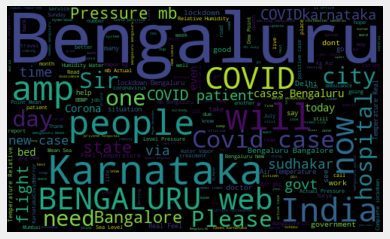

In [12]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width= 500, height = 300, random_state= 25, max_font_size= 120).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show();



In [13]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')
df.head()
        
       

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis
0,Indian Academy of Sciences a Bengalurubased bo...,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.000000,-0.500,Negative
1,IndiaFightsCOVID – Bengaluru’s COVID count is ...,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.000000,0.000,Neutral
2,Its and the temperature in Bengaluru is curre...,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.550000,0.000,Neutral
3,Join the Covance team See our latest job openi...,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.900000,0.500,Positive
4,Dear Administrator Please dont let repeat wha...,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.458333,0.125,Positive


Cleaning 
Remove Punctuation
Tokenization
Remove Stop Words
Stemming/Lemmatizing

In [14]:
pd.set_option('display.max_colwidth',280)
df['tweets'].head()

0               Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August  is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair
1                                                                                                    IndiaFightsCOVID – Bengaluru’s COVID count is about to hit  \n\nWatch Viewpoint with Jacob cowBKvmcBH
2                                                                                                           Its  and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU
3                                                                                                                 Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA
4     Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['Tweet_punct'] = df['tweets'].apply(lambda x: remove_punct(x))
df.to_csv('tweets_exported_removed_punct.csv', encoding='utf-8')
df.head(10)


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct
0,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.000000,-0.500000,Negative,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair
1,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.000000,0.000000,Neutral,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH
2,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.550000,0.000000,Neutral,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU
3,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.900000,0.500000,Positive,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA
4,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.458333,0.125000,Positive,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose
5,I booked a ticket form bengaluru to Frankfurt on July I did a mistake in my name how would I correct it could please help I try to reach customer support many time but not responding will you help in this,1280116937909915649,2020-07-06 12:30:36,Twitter for iPhone,0,0,0.500000,0.500000,Positive,I booked a ticket form bengaluru to Frankfurt on July I did a mistake in my name how would I correct it could please help I try to reach customer support many time but not responding will you help in this
6,ExpressExplained The Karnataka government has allowed asymptomatic and mild symptomatic Covid patients including those in Bengaluru to be in home isolation\n\n explains \n\ncoJBDFeXCWB,1280116788806782977,2020-07-06 12:30:00,TweetDeck,0,0,0.500000,0.333333,Positive,ExpressExplained The Karnataka government has allowed asymptomatic and mild symptomatic Covid patients including those in Bengaluru to be in home isolation\n\n explains \n\ncoJBDFeXCWB
7,I have been sending several tweets explaining that despite the amc your people in BENGALURU are not attending to service the water filter Your useless call centre is unable to help Call me on if you want to respond to customers complaint,1280116748528672769,2020-07-06 12:29:50,Twitter for Android,0,0,0.225000,-0.325000,Negative,I have been sending several tweets explaining that despite the amc your people in BENGALURU are not attending to service the water filter Your useless call centre is unable to help Call me on if you want to respond to customers complaint
8,Congrats,1280116389324312576,2020-07-06 12:28:25,Twitter for Android,0,0,0.000000,0.000000,Neutral,Congrats
9,The Karnataka government has allowed asymptomatic and mild symptomatic Covid patients including those in Bengaluru to be in home isolation\n\nHere are the guidelines for home isolation of COVID positive people\n\nTeamPCMohan PCMohan Visionary BJPKarnataka BJPKarnataka coAufVDHpE,1280116023874609152,2020-07-06 12:26:58,Twitter Web App,0,0,0.522727,0.280303,Positive,The Karnataka government has allowed asymptomatic and mild symptomatic Covid patients including those in Bengaluru to be in home

Tokenization

In [17]:
import re

def tokenize(text):
  tokens = re.split('\W+',text)
  return tokens

df['tweet_clean_tokenized'] = df['Tweet_punct'].apply(lambda x:tokenize(x.lower()))
df['tweet_clean_tokenized'].head(5)
#df['Tweet_punct'].head(5)


0                        [indian, academy, of, sciences, a, bengalurubased, body, of, scientists, says, the, icmr, target, to, launch, a, coronavirus, vaccine, by, august, is, unfeasible, and, unrealistic, pti, hawk, eye, port, blair]
1                                                                                                                            [indiafightscovid, bengaluru, s, covid, count, is, about, to, hit, watch, viewpoint, with, jacob, cowbkvmcbh]
2                                                                                                                             [its, and, the, temperature, in, bengaluru, is, currently, c, and, moderately, windy, iotdotoh, cogzkhbxfpu]
3                                                                                                                                  [join, the, covance, team, see, our, latest, job, opening, here, cozqiljmhs, healthcare, bengaluru, ka]
4    [, dear, administrator, please, dont, let, repeat, what

No Stop Words

In [18]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_clean_nostopwords'] = df['tweet_clean_tokenized'].apply(lambda x:remove_stopwords(x))
df['tweet_clean_nostopwords'].head(5)

0    [indian, academy, sciences, bengalurubased, body, scientists, says, icmr, target, launch, coronavirus, vaccine, august, unfeasible, unrealistic, pti, hawk, eye, port, blair]
1                                                                                            [indiafightscovid, bengaluru, covid, count, hit, watch, viewpoint, jacob, cowbkvmcbh]
2                                                                                                 [temperature, bengaluru, currently, c, moderately, windy, iotdotoh, cogzkhbxfpu]
3                                                                                          [join, covance, team, see, latest, job, opening, cozqiljmhs, healthcare, bengaluru, ka]
4             [, dear, administrator, please, dont, let, repeat, happening, bengaluru, itd, better, learn, cities, experiencing, sudden, outbreak, unlock, time, tighten, noose, ]
Name: tweet_clean_nostopwords, dtype: object

In [20]:
def merge_text(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['tweet_ready'] = df['tweet_clean_nostopwords'].apply(lambda x: merge_text(x))
df.to_csv('tweets_exported_ready.csv', encoding='utf-8')
df.head(10)

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.000000,-0.500000,Negative,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,"[indian, academy, of, sciences, a, bengalurubased, body, of, scientists, says, the, icmr, target, to, launch, a, coronavirus, vaccine, by, august, is, unfeasible, and, unrealistic, pti, hawk, eye, port, blair]","[indian, academy, sciences, bengalurubased, body, scientists, says, icmr, target, launch, coronavirus, vaccine, august, unfeasible, unrealistic, pti, hawk, eye, port, blair]",indian academy sciences bengalurubased body scientists says icmr target launch coronavirus vaccine august unfeasible unrealistic pti hawk eye port blair
1,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.000000,0.000000,Neutral,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,"[indiafightscovid, bengaluru, s, covid, count, is, about, to, hit, watch, viewpoint, with, jacob, cowbkvmcbh]","[indiafightscovid, bengaluru, covid, count, hit, watch, viewpoint, jacob, cowbkvmcbh]",indiafightscovid bengaluru covid count hit watch viewpoint jacob cowbkvmcbh
2,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.550000,0.000000,Neutral,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,"[its, and, the, temperature, in, bengaluru, is, currently, c, and, moderately, windy, iotdotoh, cogzkhbxfpu]","[temperature, bengaluru, currently, c, moderately, windy, iotdotoh, cogzkhbxfpu]",temperature bengaluru currently c moderately windy iotdotoh cogzkhbxfpu
3,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.900000,0.500000,Positive,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,"[join, the, covance, team, see, our, latest, job, opening, here, cozqiljmhs, healthcare, bengaluru, ka]","[join, covance, team, see, latest, job, opening, cozqiljmhs, healthcare, bengaluru, ka]",join covance team see latest job opening cozqiljmhs healthcare bengaluru ka
4,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.458333,0.125000,Positive,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,"[, dear, administrator, please, dont, let, repeat, what, is, happening, in, bengaluru, itd, be, better, if, we, learn, from, other, cities, experiencing, the, sudden, outbreak, after, unlock, its, time, to, tighten, the, noose, ]","[, dear, administrator, please, dont, let, repeat, happening, bengaluru, itd, better, learn, cities, experiencing, sudden, outbreak, unlock, time, tighten, noose, ]",dear administrator please dont let repeat happening bengaluru itd better learn cities experiencing sudden outbreak unlock time tighten noose
5,I booked a ticket form bengaluru to Frankfurt on July I did a mistake in my name how would I correct it could please help I try to reach customer support many time but not respo

In [21]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweet_ready'].apply(getSubjectivity)
df['Polarity'] = df['tweet_ready'].apply(getPolarity)

df.head()

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.0,-0.50,Negative,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,"[indian, academy, of, sciences, a, bengalurubased, body, of, scientists, says, the, icmr, target, to, launch, a, coronavirus, vaccine, by, august, is, unfeasible, and, unrealistic, pti, hawk, eye, port, blair]","[indian, academy, sciences, bengalurubased, body, scientists, says, icmr, target, launch, coronavirus, vaccine, august, unfeasible, unrealistic, pti, hawk, eye, port, blair]",indian academy sciences bengalurubased body scientists says icmr target launch coronavirus vaccine august unfeasible unrealistic pti hawk eye port blair
1,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.0,0.00,Neutral,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,"[indiafightscovid, bengaluru, s, covid, count, is, about, to, hit, watch, viewpoint, with, jacob, cowbkvmcbh]","[indiafightscovid, bengaluru, covid, count, hit, watch, viewpoint, jacob, cowbkvmcbh]",indiafightscovid bengaluru covid count hit watch viewpoint jacob cowbkvmcbh
2,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.7,0.00,Neutral,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,"[its, and, the, temperature, in, bengaluru, is, currently, c, and, moderately, windy, iotdotoh, cogzkhbxfpu]","[temperature, bengaluru, currently, c, moderately, windy, iotdotoh, cogzkhbxfpu]",temperature bengaluru currently c moderately windy iotdotoh cogzkhbxfpu
3,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.9,0.50,Positive,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,"[join, the, covance, team, see, our, latest, job, opening, here, cozqiljmhs, healthcare, bengaluru, ka]","[join, covance, team, see, latest, job, opening, cozqiljmhs, healthcare, bengaluru, ka]",join covance team see latest job opening cozqiljmhs healthcare bengaluru ka
4,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.5,0.25,Positive,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,"[, dear, administrator, please, dont, let, repeat, what, is, happening, in, bengaluru, itd, be, better, if, we, learn, from, other, cities, experiencing, the, sudden, outbreak, after, unlock, its, time, to, tighten, the, noose, ]","[, dear, administrator, please, dont, let, repeat, happening, bengaluru, itd, better, learn, cities, experiencing, sudden, outbreak, unlock, time, tighten, noose, ]",dear administrator please dont let repeat happening bengaluru itd better learn cities experiencing sudden outbreak unlock time tighten noose


In [22]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')
df.head(10)

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.000000,-0.500000,Negative,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,"[indian, academy, of, sciences, a, bengalurubased, body, of, scientists, says, the, icmr, target, to, launch, a, coronavirus, vaccine, by, august, is, unfeasible, and, unrealistic, pti, hawk, eye, port, blair]","[indian, academy, sciences, bengalurubased, body, scientists, says, icmr, target, launch, coronavirus, vaccine, august, unfeasible, unrealistic, pti, hawk, eye, port, blair]",indian academy sciences bengalurubased body scientists says icmr target launch coronavirus vaccine august unfeasible unrealistic pti hawk eye port blair
1,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.000000,0.000000,Neutral,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,"[indiafightscovid, bengaluru, s, covid, count, is, about, to, hit, watch, viewpoint, with, jacob, cowbkvmcbh]","[indiafightscovid, bengaluru, covid, count, hit, watch, viewpoint, jacob, cowbkvmcbh]",indiafightscovid bengaluru covid count hit watch viewpoint jacob cowbkvmcbh
2,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.700000,0.000000,Neutral,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,"[its, and, the, temperature, in, bengaluru, is, currently, c, and, moderately, windy, iotdotoh, cogzkhbxfpu]","[temperature, bengaluru, currently, c, moderately, windy, iotdotoh, cogzkhbxfpu]",temperature bengaluru currently c moderately windy iotdotoh cogzkhbxfpu
3,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.900000,0.500000,Positive,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,"[join, the, covance, team, see, our, latest, job, opening, here, cozqiljmhs, healthcare, bengaluru, ka]","[join, covance, team, see, latest, job, opening, cozqiljmhs, healthcare, bengaluru, ka]",join covance team see latest job opening cozqiljmhs healthcare bengaluru ka
4,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.500000,0.250000,Positive,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,"[, dear, administrator, please, dont, let, repeat, what, is, happening, in, bengaluru, itd, be, better, if, we, learn, from, other, cities, experiencing, the, sudden, outbreak, after, unlock, its, time, to, tighten, the, noose, ]","[, dear, administrator, please, dont, let, repeat, happening, bengaluru, itd, better, learn, cities, experiencing, sudden, outbreak, unlock, time, tighten, noose, ]",dear administrator please dont let repeat happening bengaluru itd better learn cities experiencing sudden outbreak unlock time tighten noose
5,I booked a ticket form bengaluru to Frankfurt on July I did a mistake in my name how would I correct it could please help I try to reach customer support many time but not respo

Stemming

In [23]:
df.dtypes

tweets                             object
id                                  int64
date                       datetime64[ns]
source                             object
likes                               int64
retweets                            int64
Subjectivity                      float64
Polarity                          float64
Analysis                           object
Tweet_punct                        object
tweet_clean_tokenized              object
tweet_clean_nostopwords            object
tweet_ready                        object
dtype: object

In [24]:
df.head()

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,1280117520016355328,2020-07-06 12:32:54,Twitter for Android,0,0,1.0,-0.50,Negative,Indian Academy of Sciences a Bengalurubased body of scientists says the ICMR target to launch a coronavirus vaccine by August is unfeasible and unrealistic PTI\n\n• Hawk Eye\nPort Blair,"[indian, academy, of, sciences, a, bengalurubased, body, of, scientists, says, the, icmr, target, to, launch, a, coronavirus, vaccine, by, august, is, unfeasible, and, unrealistic, pti, hawk, eye, port, blair]","[indian, academy, sciences, bengalurubased, body, scientists, says, icmr, target, launch, coronavirus, vaccine, august, unfeasible, unrealistic, pti, hawk, eye, port, blair]",indian academy sciences bengalurubased body scientists says icmr target launch coronavirus vaccine august unfeasible unrealistic pti hawk eye port blair
1,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,1280117208736096257,2020-07-06 12:31:40,Twitter Media Studio - LiveCut,8,1,0.0,0.00,Neutral,IndiaFightsCOVID – Bengaluru’s COVID count is about to hit \n\nWatch Viewpoint with Jacob cowBKvmcBH,"[indiafightscovid, bengaluru, s, covid, count, is, about, to, hit, watch, viewpoint, with, jacob, cowbkvmcbh]","[indiafightscovid, bengaluru, covid, count, hit, watch, viewpoint, jacob, cowbkvmcbh]",indiafightscovid bengaluru covid count hit watch viewpoint jacob cowbkvmcbh
2,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,1280117088829521920,2020-07-06 12:31:12,SimonsStudy,0,0,0.7,0.00,Neutral,Its and the temperature in Bengaluru is currently C and moderately windy IoTDotOh cogzkHbxFPU,"[its, and, the, temperature, in, bengaluru, is, currently, c, and, moderately, windy, iotdotoh, cogzkhbxfpu]","[temperature, bengaluru, currently, c, moderately, windy, iotdotoh, cogzkhbxfpu]",temperature bengaluru currently c moderately windy iotdotoh cogzkhbxfpu
3,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,1280117020030164995,2020-07-06 12:30:55,CareerArc 2.0,0,0,0.9,0.50,Positive,Join the Covance team See our latest job opening here cozqiLJmHS Healthcare Bengaluru KA,"[join, the, covance, team, see, our, latest, job, opening, here, cozqiljmhs, healthcare, bengaluru, ka]","[join, covance, team, see, latest, job, opening, cozqiljmhs, healthcare, bengaluru, ka]",join covance team see latest job opening cozqiljmhs healthcare bengaluru ka
4,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,1280116971267186689,2020-07-06 12:30:44,Twitter for Android,0,0,0.5,0.25,Positive,Dear Administrator Please dont let repeat what is happening in Bengaluru Itd be better if we learn from other cities experiencing the sudden outbreak after Unlock Its time to tighten the noose,"[, dear, administrator, please, dont, let, repeat, what, is, happening, in, bengaluru, itd, be, better, if, we, learn, from, other, cities, experiencing, the, sudden, outbreak, after, unlock, its, time, to, tighten, the, noose, ]","[, dear, administrator, please, dont, let, repeat, happening, bengaluru, itd, better, learn, cities, experiencing, sudden, outbreak, unlock, time, tighten, noose, ]",dear administrator please dont let repeat happening bengaluru itd better learn cities experiencing sudden outbreak unlock time tighten noose


In [25]:
#Using the machine learning concepts : SVM model
print(df['tweet_ready'].shape)

(5000,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

k = cv.fit(df['tweet_ready'])
print(k.vocabulary_)
print(cv.get_feature_names())


{'indian': 8350, 'academy': 53, 'sciences': 12476, 'bengalurubased': 1095, 'body': 1373, 'scientists': 12479, 'says': 12438, 'icmr': 8182, 'target': 13660, 'launch': 9189, 'coronavirus': 4563, 'vaccine': 14425, 'august': 761, 'unfeasible': 14287, 'unrealistic': 14329, 'pti': 11485, 'hawk': 7835, 'eye': 6940, 'port': 11184, 'blair': 1300, 'indiafightscovid': 8344, 'bengaluru': 1089, 'covid': 5089, 'count': 4965, 'hit': 7980, 'watch': 14701, 'viewpoint': 14538, 'jacob': 8688, 'cowbkvmcbh': 5216, 'temperature': 13738, 'currently': 5792, 'moderately': 9969, 'windy': 14837, 'iotdotoh': 8602, 'cogzkhbxfpu': 2924, 'join': 8774, 'covance': 5047, 'team': 13696, 'see': 12538, 'latest': 9183, 'job': 8753, 'opening': 10608, 'cozqiljmhs': 5628, 'healthcare': 7856, 'ka': 8827, 'dear': 5936, 'administrator': 163, 'please': 11100, 'dont': 6385, 'let': 9263, 'repeat': 11951, 'happening': 7787, 'itd': 8655, 'better': 1177, 'learn': 9224, 'cities': 1970, 'experiencing': 6895, 'sudden': 13418, 'outbreak':

In [27]:
k = cv.transform(df['tweets'])
print(k.shape)
print(k.toarray())
dfcv = pd.DataFrame(k.toarray(), columns = cv.get_feature_names())
print(dfcv)

(5000, 15128)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
      aa  aadhaar  aadmi  aaj  aalubonda  aam  ...  𝘶𝘴  𝘸𝘪𝘵𝘩  𝙇𝙚𝙩𝙨  𝙛𝙡𝙮  𝙝𝙤𝙢𝙚  𝙮𝙤𝙪
0      0        0      0    0          0    0  ...   0     0     0    0     0    0
1      0        0      0    0          0    0  ...   0     0     0    0     0    0
2      0        0      0    0          0    0  ...   0     0     0    0     0    0
3      0        0      0    0          0    0  ...   0     0     0    0     0    0
4      0        0      0    0          0    0  ...   0     0     0    0     0    0
...   ..      ...    ...  ...        ...  ...  ...  ..   ...   ...  ...   ...  ...
4995   0        0      0    0          0    0  ...   0     0     0    0     0    0
4996   0        0      0    0          0    0  ...   0     0     0    0     0    0
4997   0        0      0    0          0    0  ...   0     0     0    0     0    0
4998   0        0      0    0       

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer()

l = tfidfv.fit(df['tweet_ready'])
print(l.vocabulary_)
print(tfidfv.get_feature_names())

{'indian': 8350, 'academy': 53, 'sciences': 12476, 'bengalurubased': 1095, 'body': 1373, 'scientists': 12479, 'says': 12438, 'icmr': 8182, 'target': 13660, 'launch': 9189, 'coronavirus': 4563, 'vaccine': 14425, 'august': 761, 'unfeasible': 14287, 'unrealistic': 14329, 'pti': 11485, 'hawk': 7835, 'eye': 6940, 'port': 11184, 'blair': 1300, 'indiafightscovid': 8344, 'bengaluru': 1089, 'covid': 5089, 'count': 4965, 'hit': 7980, 'watch': 14701, 'viewpoint': 14538, 'jacob': 8688, 'cowbkvmcbh': 5216, 'temperature': 13738, 'currently': 5792, 'moderately': 9969, 'windy': 14837, 'iotdotoh': 8602, 'cogzkhbxfpu': 2924, 'join': 8774, 'covance': 5047, 'team': 13696, 'see': 12538, 'latest': 9183, 'job': 8753, 'opening': 10608, 'cozqiljmhs': 5628, 'healthcare': 7856, 'ka': 8827, 'dear': 5936, 'administrator': 163, 'please': 11100, 'dont': 6385, 'let': 9263, 'repeat': 11951, 'happening': 7787, 'itd': 8655, 'better': 1177, 'learn': 9224, 'cities': 1970, 'experiencing': 6895, 'sudden': 13418, 'outbreak':

In [29]:
l = tfidfv.transform(df['tweets'])
print(l.shape)
print(l.toarray())
print(l)
dftfidv = pd.DataFrame(l.toarray(), columns = tfidfv.get_feature_names())
dftfidv.to_csv('dataset.csv', encoding='utf-8')  
#dftfidv['Analysis']=df['Analysis']
print(dftfidv)

(5000, 15128)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 14425)	0.2138274383408128
  (0, 14329)	0.22657094640584047
  (0, 14287)	0.22657094640584047
  (0, 13660)	0.22240632554919715
  (0, 12479)	0.22240632554919715
  (0, 12476)	0.21870545491874593
  (0, 12438)	0.16770051731991356
  (0, 11485)	0.2631256664517663
  (0, 11184)	0.2936139028658549
  (0, 9189)	0.2109322617990298
  (0, 8350)	0.17437754175310394
  (0, 8182)	0.2082689575552085
  (0, 7835)	0.28012264333037873
  (0, 6940)	0.2705504423554053
  (0, 4563)	0.14261986102415497
  (0, 1373)	0.17005021377466553
  (0, 1300)	0.2936139028658549
  (0, 1095)	0.19652934139709238
  (0, 761)	0.19652934139709238
  (0, 53)	0.19652934139709238
  (1, 14701)	0.30755445039050483
  (1, 14538)	0.43088491727588757
  (1, 8688)	0.3970387772357101
  (1, 8344)	0.31379651025207184
  (1, 7980)	0.343393914477872
  :	:
  (4997, 10844)	0.19997445

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 15128) (4000,)
Test set: (1000, 15128) (1000,)


In [31]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()


In [32]:
prediction_linear = classifier_linear.predict(X_test)
prediction_linear[0:5]

array(['Negative', 'Positive', 'Negative', 'Positive', 'Positive'],
      dtype=object)

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_linear))

DecisionTrees's Accuracy:  0.777


In [34]:
print(y_test +" |"+prediction_linear)

2175    Negative |Negative
3156     Neutral |Positive
337     Negative |Negative
444     Positive |Positive
2334    Positive |Positive
               ...        
1862    Positive |Positive
1028    Positive |Positive
4430    Positive |Positive
3025     Positive |Neutral
1807      Neutral |Neutral
Name: Analysis, Length: 1000, dtype: object


In [ ]:
#Using the machine learning concepts : Naive Bayes Theorem

In [36]:
#test train split data
#X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(dftfidv,df['Analysis'],test_size=0.2,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 15128) (4000,)
Test set: (1000, 15128) (1000,)


In [41]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#train naive bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
#naive_bayes = MultinomialNB()
#naive_bayes.fit(X_train,y_train)
#MultinomialNB()
#print(naives_bayes.predict(X[2:3]))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
prediction_naive_bayes = clf.predict(X_test)
prediction_naive_bayes[0:5]

array(['Neutral', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_naive_bayes))

DecisionTrees's Accuracy:  0.57


In [ ]:
print(y_test +" |"+prediction_naive_bayes)

83      Neutral |Neutral
53      Neutral |Neutral
70      Neutral |Neutral
45     Neutral |Positive
44     Positive |Neutral
39     Positive |Neutral
22     Negative |Neutral
80    Positive |Positive
10      Neutral |Neutral
0       Neutral |Neutral
18     Positive |Neutral
30      Neutral |Neutral
73     Neutral |Positive
33     Positive |Neutral
90      Neutral |Neutral
4       Neutral |Neutral
76     Negative |Neutral
77      Neutral |Neutral
12     Negative |Neutral
31    Negative |Positive
Name: Analysis, dtype: object


In [ ]:
#positive tweets

print("positive tweets :")
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

positive tweets :
1) sir you are surgeon by profession as per your twitter profile please check what kind of blood is running in ur/bjp body if it was indian you would have preferred to evict china than wasting your precious time in fighting with rahul gandhi n congress is bjp afraid of rahul gandhi?

2) I really sometimes feel Rahul Gandhi is like a shadow of Modi wherever Modi goes Rahul Gandhi follows him and this image proved me right

3)PM Modi has the second toughest job in India, Rahul Gandhi’s sign language interpreter has the first. Lifted from here .co/ADdcyPD0GG

4)  Congress must answer really 😂😂
Why not you demand resignation of Rahul Gandhi from India PM post .

5)_01 _Modi_Bhakt _ But why congress is keen to know the armh deployment whereabouts and more over what agreement did rahul gandhi your leader signed with china. mullaji

6)_ Good Job Nizami... once old #pidis tire out, there will be race to become fav pet of Rahul Gandhi.

You surely have seen future and working 

In [ ]:
#negative tweets


print("negative tweets : ")
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

negative tweets : 
1)Rauf Khan ( Rahul Gandhi ) say Sorry to Army and Nation. .co/hlzj2VL2VO

2) The most pathetic leader india has ever had shame on you rahul gandhi for using your own party workers to spread the false and fake narrative provoking enemies to take the benefit from your remarks.
India needs new opposition. You have became blind while hating modi and BJP govt.

3)FACT CHECK: Rahul Gandhi passes off Congress functionaries as ordinary
 .co/wHNYQ6ji48

4) ya absolutely no doubt🤣🤣
i applaud him for his knowledge base and orating skill,
i m still searching a leader frm opposition who can take him on fact, bt none, gaurabh vallabh rose and sank, and den none, 
...
anyway rahul gandhi still the leader in comefy🤣

5)     I dont know what kind of people they are who support useless person like Rahul Gandhi. He is a son of  Late RAJIV Gandhi that sit. He is nothing.

6)  #FactCheck :  passes off #Congress functionaries as ordinary #Ladakhis to slam Prime Minister  

The Truth.

#A

In [ ]:
#neutral tweets


print("Neutral tweets :")

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

Neutral tweets :
1) _IN Even intelligent people in Congress are infected with a moron virus called Rahul Gandhi.

2) Thats just Rahul Gandhi accompanying the PM to Leh

3) Rahul Gandhi accompanied the PM to Leh

4) Tumh Jaise logo ko sharm nhi atti bilkul BHI😂😂😂
Nxt time try to demand resignation of Rahul Gandhi from PM post of India

5) Bhaiya But no one is watching and commenting on the video, why that woman is beaten?
Forget Rahul Gandhi, chk the video and have some sympathy with that woman..
🙏🙏🙏🙏

6)_rathee You and Rahul Gandhi 🤦‍♀️

7) grow up! 
.co/fyMTbzQGza

8) I nominate this person for Rahul Gandhi Award for 2020.

9)Please for once just go and search on Google ' Rahul Gandhi or Roll Vinci' 
#hypocritesVadraCong

10) Option            =    Result 
Reservations = Rahul Gandhi
Merit                =  Narendra Modi
Let the public decide.

11) from today Its my only goal to educate you in twitter. and explain you why you are a traitor and you must learn how to respect India and s

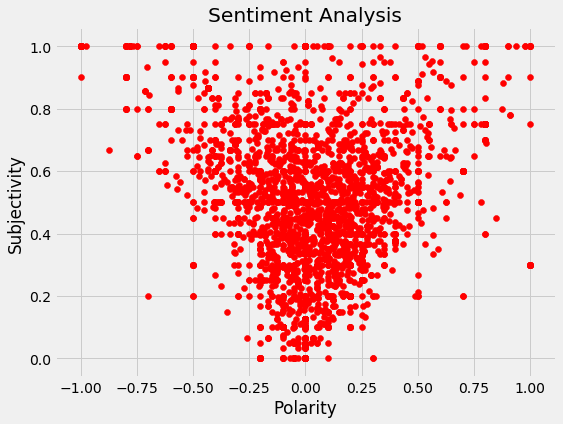

In [ ]:
#PLot the polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color= 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [ ]:
#percentage of tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
p =round (ptweets.shape[0] / df.shape[0] * 100, 1 )
print("positive tweets percentage : " + str(p))


ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
n= round (ntweets.shape[0] / df.shape[0] * 100, 1 )
print("negative tweets percentage : " + str(n))

netweets = df[df.Analysis == 'Neutral']
netweets = netweets['tweets']
ne= round (netweets.shape[0] / df.shape[0] * 100, 1 )
print("neutral tweets percentage : " + str(ne))

positive tweets percentage : 33.6
negative tweets percentage : 30.2
neutral tweets percentage : 36.2


In [ ]:
#value counts 

df['Analysis'].value_counts()

Neutral     1809
Positive    1680
Negative    1511
Name: Analysis, dtype: int64

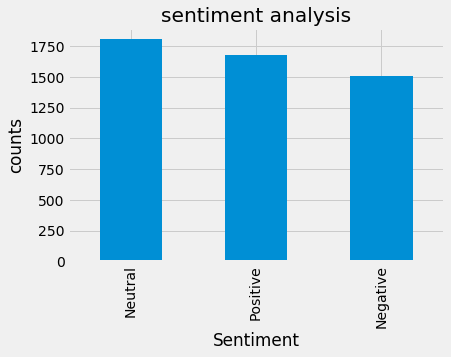

In [ ]:
#plot the graph

plt.title('sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

How people are reacting on Rahul Gandhi by analyzing 5000 Tweets : 


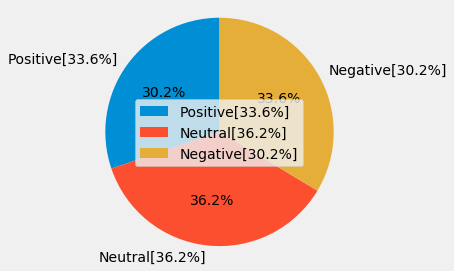

In [ ]:
import matplotlib.pyplot as plt

print("How people are reacting on " + searchTerm + " by analyzing " + str(noofsearch) + " Tweets : ")

labels=[r'Positive['+str(p)+'%]',r'Neutral['+str(ne)+'%]', r'Negative['+str(n)+'%]']
sizes = [n, ne, p]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center")
plt.tight_layout()
plt.show()


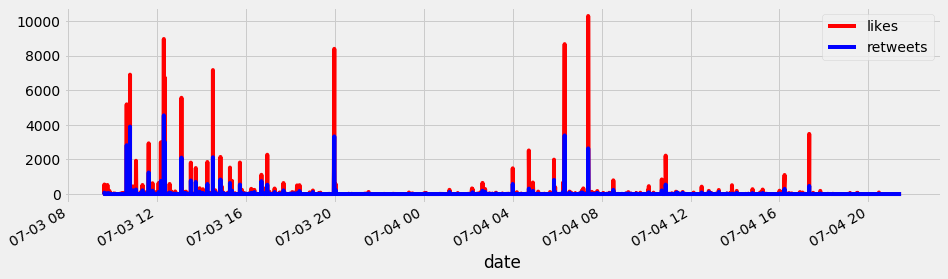

In [ ]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16,4), label= "likes", legend= True, color = 'r')
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(14,4), label= "retweets", legend= True, color = 'b')
plt.show()